In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [2]:
pd.options.display.max_colwidth=800
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('datasets/SatisfactionClients/cdiscount_retraite.csv', index_col=0)
df.sample(3)

,pays,note,titre,commentaire,Commentaire_filtre,titre_filtre
98403,FR,1,E-SHOP Pas serieux publicité mensongere…,"11 mars 2019E-SHOP Pas serieux publicité mensongere…E-SHOP Pas serieux publicité mensongere et voleur! Prix exactement similaire au autre sites.J'ai acheter une friteuse en Janvier on ma envoyer a 2 reprises la mauvaise reference je demande remboursement et jusqu'a aujourdhui toujours pas rembourser (3mois)! Un service client pitoyable, qui ma literalement dit que si il etait une société a 6M€ c'etais pas grace a des gens comme moi et que pour me faire rembourser fallais que j'attende. Heureusement qu'il existe des E-Shop plus serieux comme Amazone et autreDate de l'expérience: 11 mars 2019","['mars', 'shop', 'serieux', 'publicité', 'mensongere', 'shop', 'serieux', 'publicité', 'mensongere', 'voleur', 'prix', 'exactement', 'similaire', 'autre', 'sites', 'acheter', 'friteuse', 'janvier', 'envoyer', 'reprises', 'mauvaise', 'reference', 'demande', 'remboursement', 'jusqu', 'aujourdhui', 'toujours', 'rembourser', 'mois', 'service', 'client', 'pitoyable', 'literalement', 'dit', 'etait', 'société', 'etais', 'grace', 'gens', 'comme', 'faire', 'rembourser', 'fallais', 'attende', 'heureusement', 'existe', 'shop', 'plus', 'serieux', 'comme', 'amazone', 'autredate', 'expérience', 'mars']","['shop', 'serieux', 'publicité', 'mensongere']"
35133,FR,5,Depuis mon première achat jusque…,29 avr. 2021Sur invitationDepuis mon première achat jusque…Depuis mon première achat jusque maintenant je suis très contient de vos services. MerciDate de l'expérience: 29 avril 2021,"['avr', 'invitationdepuis', 'première', 'achat', 'jusque', 'depuis', 'première', 'achat', 'jusque', 'maintenant', 'très', 'contient', 'services', 'mercidate', 'expérience', 'avril']","['depuis', 'première', 'achat', 'jusque']"
75118,FR,5,excellent ghislaine urier,"4 avr. 2020Vérifiéexcellent ghislaine urierexcellent, j'adhereDate de l'expérience: 04 avril 2020","['avr', 'vérifiéexcellent', 'ghislaine', 'urierexcellent', 'adheredate', 'expérience', 'avril']","['excellent', 'ghislaine', 'urier']"


In [4]:
# séparation de la variable cible et des variables explicatives
X = df['titre_filtre']
y = df['note']

<AxesSubplot:xlabel='note', ylabel='count'>

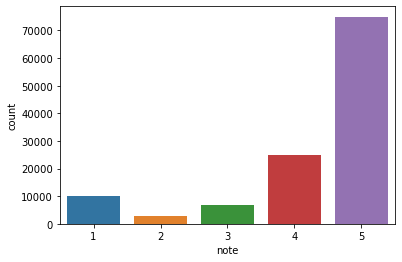

In [5]:
import seaborn as sns
sns.countplot(x='note', data=df)

In [7]:
# séparation du jeu de données en un dataset d'entrainement et un dataset de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [8]:
# conversion des chaines de caratères en tokens numériques
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=3)
X_train = vectorizer.fit_transform(X_train).todense()
X_test = vectorizer.transform(X_test).todense()

In [9]:
X_train.shape

(96000, 3432)

In [16]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report

br = BalancedRandomForestClassifier(n_estimators=100, max_depth=10)
br.fit(X_train, y_train)

y_pred_br = br.predict(X_test)

print(br.score(X_test, y_test), end='\n\n')

cr_br = classification_report(y_test, y_pred_br)
print(cr_br)

# affichage de la matrice de confusion pour voir si les données se sont bien classées
cm_br = pd.crosstab(y_test, y_pred_br, rownames=['données réelles'], colnames=['données prédites'])
display(cm_br)

# on peut tester le modèles sur de nouveaux commentaire pour voir la prédictions qui seraits faites
new_comments = ["satisfait et delai de livraison au top", "Bel article mais malheureusement trop petit", "Très déçu et c'est la deuxième fois ! ! ! Il n ' y avait aucun produits qui correspondaient à ma commande et en plus ils étaient cassés", "La veste est trop serré 42 veste Que j ’ avais déjà commander en 40 Déçu Et plus de taille au dessus du 42 dommage Pour cet article"]

# on tokenize les commentaires à partir du modèle vectorizer existant
new_comments_token = vectorizer.transform(new_comments).todense()

# on prédit les données à partir à parti du modèle clf et on regarde si c'est cohérent
y_predict_test_br = br.predict(new_comments_token)
print('les prédictions sur le test remontent les notes suivantes : ', y_predict_test_br, ' Détail ci-dessous :\n', new_comments[0], ' - la note est de :', y_predict_test_br[0], '\n', new_comments[1], ' - la note est de :',  y_predict_test_br[1], '\n', new_comments[2], ' - la note est de :',  y_predict_test_br[2], '\n', new_comments[3], ' - la note est de :', y_predict_test_br[3])

C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.477125

              precision    recall  f1-score   support

           1       0.42      0.49      0.45      2010
           2       0.05      0.48      0.09       530
           3       0.20      0.22      0.21      1355
           4       0.35      0.32      0.33      5150
           5       0.82      0.55      0.66     14955

    accuracy                           0.48     24000
   macro avg       0.37      0.41      0.35     24000
weighted avg       0.64      0.48      0.54     24000



données prédites,1,2,3,4,5
données réelles,,,,,
1,988,737,102,60,123
2,111,254,98,28,39
3,149,627,301,151,127
4,328,1253,440,1639,1490
5,803,2507,582,2794,8269


les prédictions sur le test remontent les notes suivantes :  [5 3 5 3]  Détail ci-dessous :
 satisfait et delai de livraison au top  - la note est de : 5 
 Bel article mais malheureusement trop petit  - la note est de : 3 
 Très déçu et c'est la deuxième fois ! ! ! Il n ' y avait aucun produits qui correspondaient à ma commande et en plus ils étaient cassés  - la note est de : 5 
 La veste est trop serré 42 veste Que j ’ avais déjà commander en 40 Déçu Et plus de taille au dessus du 42 dommage Pour cet article  - la note est de : 3


C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [29]:
br2 = BalancedRandomForestClassifier()
br2.fit(X_train, y_train)

y_pred_br2 = br2.predict(X_test)

print(br2.score(X_test, y_test), end='\n\n')

cr_br2 = classification_report(y_test, y_pred_br2)
print(cr_br2)

# affichage de la matrice de confusion pour voir si les données se sont bien classées
cm_br2 = pd.crosstab(y_test, y_pred_br2, rownames=['données réelles'], colnames=['données prédites'])
display(cm_br2)

# on peut tester le modèles sur de nouveaux commentaire pour voir la prédictions qui seraits faites
new_comments = ["Satisfait et delai de livraison au top", "Bel article mais malheureusement trop petit", "Très déçu et c'est la deuxième fois ! ! ! Il n ' y avait aucun produits qui correspondaient à ma commande et en plus ils étaient cassés", "La veste est trop serré 42 veste Que j ’ avais déjà commander en 40 Déçu Et plus de taille au dessus du 42 dommage Pour cet article"]

# on tokenize les commentaires à partir du modèle vectorizer existant
new_comments_token = vectorizer.transform(new_comments).todense()

# on prédit les données à partir à parti du modèle clf et on regarde si c'est cohérent
y_predict_test_br = br2.predict(new_comments_token)
print('les prédictions sur le test remontent les notes suivantes : ', y_predict_test_br, ' Détail ci-dessous :\n', new_comments[0], ' - la note est de :', y_predict_test_br[0], '\n', new_comments[1], ' - la note est de :',  y_predict_test_br[1], '\n', new_comments[2], ' - la note est de :',  y_predict_test_br[2], '\n', new_comments[3], ' - la note est de :', y_predict_test_br[3])

C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.5508333333333333

              precision    recall  f1-score   support

           1       0.52      0.54      0.53      2010
           2       0.07      0.39      0.12       530
           3       0.20      0.29      0.23      1355
           4       0.37      0.39      0.38      5150
           5       0.83      0.64      0.72     14955

    accuracy                           0.55     24000
   macro avg       0.40      0.45      0.40     24000
weighted avg       0.65      0.55      0.59     24000



données prédites,1,2,3,4,5
données réelles,,,,,
1,1088,550,213,84,75
2,127,206,122,42,33
3,171,474,388,211,111
4,215,668,566,2005,1696
5,495,1102,698,3127,9533


les prédictions sur le test remontent les notes suivantes :  [4 3 2 3]  Détail ci-dessous :
 Satisfait et delai de livraison au top  - la note est de : 4 
 Bel article mais malheureusement trop petit  - la note est de : 3 
 Très déçu et c'est la deuxième fois ! ! ! Il n ' y avait aucun produits qui correspondaient à ma commande et en plus ils étaient cassés  - la note est de : 2 
 La veste est trop serré 42 veste Que j ’ avais déjà commander en 40 Déçu Et plus de taille au dessus du 42 dommage Pour cet article  - la note est de : 3


C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [28]:
[estimator.tree_.max_depth for estimator in clf.estimators_]

[1560,
 1574,
 1587,
 1609,
 1615,
 1597,
 1640,
 1526,
 1554,
 1580,
 1596,
 1531,
 1602,
 1580,
 1571,
 1557,
 1545,
 1515,
 1602,
 1546,
 1546,
 1521,
 1603,
 1503,
 1617,
 1559,
 1540,
 1585,
 1545,
 1522,
 1587,
 1613,
 1541,
 1570,
 1562,
 1587,
 1576,
 1581,
 1569,
 1544,
 1534,
 1512,
 1543,
 1591,
 1564,
 1515,
 1587,
 1580,
 1526,
 1552,
 1548,
 1505,
 1578,
 1572,
 1569,
 1538,
 1558,
 1574,
 1554,
 1556,
 1554,
 1556,
 1547,
 1526,
 1572,
 1539,
 1569,
 1622,
 1560,
 1503,
 1559,
 1591,
 1563,
 1552,
 1600,
 1616,
 1602,
 1589,
 1535,
 1554,
 1540,
 1628,
 1616,
 1575,
 1546,
 1564,
 1578,
 1538,
 1554,
 1594,
 1536,
 1572,
 1554,
 1541,
 1576,
 1525,
 1509,
 1514,
 1579,
 1634]

In [15]:
# application du modèle de RandomForestClassifier sur les tokens numériques et calcul des prédictions
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# calcul des métriques des résultats du modèle
print(clf.score(X_test, y_test), end='\n\n')

cr = classification_report(y_test, y_pred)
print(cr)

# affichage de la matrice de confusion pour voir si les données se sont bien classées
cm = pd.crosstab(y_test, y_pred, rownames=['données réelles'], colnames=['données prédites'])
display(cm)

# on peut tester le modèles sur de nouveaux commentaire pour voir la prédictions qui seraits faites
new_comments = ["Satisfait et delai de livraison au top", "Bel article mais malheureusement trop petit", "Très déçu et c'est la deuxième fois ! ! ! Il n ' y avait aucun produits qui correspondaient à ma commande et en plus ils étaient cassés", "La veste est trop serré 42 veste Que j ’ avais déjà commander en 40 Déçu Et plus de taille au dessus du 42 dommage Pour cet article"]

# on tokenize les commentaires à partir du modèle vectorizer existant
new_comments_token = vectorizer.transform(new_comments).todense()

# on prédit les données à partir à parti du modèle clf et on regarde si c'est cohérent
y_predict_test = clf.predict(new_comments_token)
print('les prédictions sur le test remontent les notes suivantes : ', y_predict_test, ' Détail ci-dessous :\n', new_comments[0], ' - la note est de :', y_predict_test[0], '\n', new_comments[1], ' - la note est de :',  y_predict_test[1], '\n', new_comments[2], ' - la note est de :',  y_predict_test[2], '\n', new_comments[3], ' - la note est de :', y_predict_test[3])

C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.669125

              precision    recall  f1-score   support

           1       0.61      0.59      0.60      2010
           2       0.14      0.07      0.09       530
           3       0.31      0.21      0.25      1355
           4       0.41      0.24      0.30      5150
           5       0.74      0.89      0.81     14955

    accuracy                           0.67     24000
   macro avg       0.44      0.40      0.41     24000
weighted avg       0.62      0.67      0.64     24000



données prédites,1,2,3,4,5
données réelles,,,,,
1,1178,74,129,133,496
2,164,38,91,86,151
3,235,65,279,318,458
4,151,52,250,1215,3482
5,210,45,154,1197,13349


les prédictions sur le test remontent les notes suivantes :  [5 3 5 4]  Détail ci-dessous :
 Satisfait et delai de livraison au top  - la note est de : 5 
 Bel article mais malheureusement trop petit  - la note est de : 3 
 Très déçu et c'est la deuxième fois ! ! ! Il n ' y avait aucun produits qui correspondaient à ma commande et en plus ils étaient cassés  - la note est de : 5 
 La veste est trop serré 42 veste Que j ’ avais déjà commander en 40 Déçu Et plus de taille au dessus du 42 dommage Pour cet article  - la note est de : 4


C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [17]:
clf2 = RandomForestClassifier(n_estimators=10, max_depth=1)

clf2.fit(X_train, y_train)

y_pred2 = clf2.predict(X_test)

print(clf2.score(X_test, y_test), end='\n\n')

cr2 = classification_report(y_test, y_pred2)
print(cr2)

# affichage de la matrice de confusion pour voir si les données se sont bien classées
cm2 = pd.crosstab(y_test, y_pred2, rownames=['données réelles'], colnames=['données prédites'])
display(cm2)

# on peut tester le modèles sur de nouveaux commentaire pour voir la prédictions qui seraits faites
new_comments = ["Satisfait et delai de livraison au top", "Bel article mais malheureusement trop petit", "Très déçu et c'est la deuxième fois ! ! ! Il n ' y avait aucun produits qui correspondaient à ma commande et en plus ils étaient cassés", "La veste est trop serré 42 veste Que j ’ avais déjà commander en 40 Déçu Et plus de taille au dessus du 42 dommage Pour cet article"]

# on tokenize les commentaires à partir du modèle vectorizer existant
new_comments_token = vectorizer.transform(new_comments).todense()

# on prédit les données à partir à parti du modèle clf et on regarde si c'est cohérent
y_predict_test = clf2.predict(new_comments_token)
print('les prédictions sur le test remontent les notes suivantes : ', y_predict_test, ' Détail ci-dessous :\n', new_comments[0], ' - la note est de :', y_predict_test[0], '\n', new_comments[1], ' - la note est de :',  y_predict_test[1], '\n', new_comments[2], ' - la note est de :',  y_predict_test[2], '\n', new_comments[3], ' - la note est de :', y_predict_test[3])

C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.623125

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2010
           2       0.00      0.00      0.00       530
           3       0.00      0.00      0.00      1355
           4       0.00      0.00      0.00      5150
           5       0.62      1.00      0.77     14955

    accuracy                           0.62     24000
   macro avg       0.12      0.20      0.15     24000
weighted avg       0.39      0.62      0.48     24000



C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


données prédites,5
données réelles,
1,2010
2,530
3,1355
4,5150
5,14955


les prédictions sur le test remontent les notes suivantes :  [5 5 5 5]  Détail ci-dessous :
 Satisfait et delai de livraison au top  - la note est de : 5 
 Bel article mais malheureusement trop petit  - la note est de : 5 
 Très déçu et c'est la deuxième fois ! ! ! Il n ' y avait aucun produits qui correspondaient à ma commande et en plus ils étaient cassés  - la note est de : 5 
 La veste est trop serré 42 veste Que j ’ avais déjà commander en 40 Déçu Et plus de taille au dessus du 42 dommage Pour cet article  - la note est de : 5


C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
